In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
from matplotlib import rcParams
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [3]:
#df = pd.read_excel('fifa_male.xlsx')
#xlsx = pd.ExcelFile('fifa_male.xlsx')
#df1 = pd.read_excel(xlsx, 'FIFA 22')
#df2 = pd.read_excel(xlsx, 'FIFA 21')
#df3 = pd.read_excel(xlsx, 'FIFA 20')
#df4 = pd.read_excel(xlsx, 'FIFA 19')
#df5 = pd.read_excel(xlsx, 'FIFA 18')
#df6 = pd.read_excel(xlsx, 'FIFA 17')
#df7 = pd.read_excel(xlsx, 'FIFA 16')
#df8 = pd.read_excel(xlsx, 'FIFA 15')

In [4]:
#df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])

In [5]:
import sys
 
# the system path
sys.path.append('/Users/Ray/codeup-data-science/fifa')
 
# importing the function
from acquire import get_fifa_data

In [6]:
df = get_fifa_data()

In [7]:
#check data shape
df.shape

(142079, 111)

In [8]:
# look at number of nulls for each column
df.isnull().sum()

sofifa_id                           0
player_url                          0
short_name                          0
long_name                           0
player_positions                    0
overall                             0
potential                           0
value_eur                        1897
wage_eur                         1622
age                                 0
dob                                 0
height_cm                           0
weight_kg                           0
club_team_id                     1630
club_name                        1630
league_name                      1630
league_level                     2015
club_position                    1630
club_jersey_number               1630
club_loaned_from               133774
club_joined                      9935
club_contract_valid_until        1630
nationality_id                      0
nationality_name                    0
nation_team_id                 133635
nation_position                133635
nation_jerse

In [9]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142079 entries, 0 to 142078
Data columns (total 111 columns):
 #    Column                       Non-Null Count   Dtype  
---   ------                       --------------   -----  
 0    sofifa_id                    142079 non-null  int64  
 1    player_url                   142079 non-null  object 
 2    short_name                   142079 non-null  object 
 3    long_name                    142079 non-null  object 
 4    player_positions             142079 non-null  object 
 5    overall                      142079 non-null  int64  
 6    potential                    142079 non-null  int64  
 7    value_eur                    140182 non-null  float64
 8    wage_eur                     140457 non-null  float64
 9    age                          142079 non-null  int64  
 10   dob                          142079 non-null  object 
 11   height_cm                    142079 non-null  int64  
 12   weight_kg                    142079 non-nu

In [10]:
import sys
 
# the system path
sys.path.append('/Users/Ray/codeup-data-science/fifa')
 
# importing the function
from prepare import prepped_data
#from prepare import split

In [11]:
df = prepped_data(df)

Before dropping nulls, 142079 rows, 111 cols
After dropping nulls. 131489 rows. 66 cols
After dropping leagues. 98804 rows. 79 cols


In [12]:
df.head()

sofifa_id         short_name player_positions  overall  potential    value_eur  wage_eur  age  height_cm  weight_kg  club_team_id            club_name             league_name  nationality_id nationality_name club_position                            position club_joined  club_contract_valid_until body_type preferred_foot  weak_foot  skill_moves  international_reputation    work_rate  pace  shooting  passing  dribbling  defending  physical  crossing  finishing  heading_accuracy  short_passing  volleys  skill_dribbling  curve  fk_accuracy  long_passing  ball_control  acceleration  sprint_speed  agility  reactions  balance  shot_power  jumping  stamina  strength  long_shots  aggression  interceptions  positioning  vision  penalties  marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  gk_kicking  gk_positioning  gk_reflexes  gk_speed  year   total_wage age_bins height_bins weight_bins  year_joined  seniority  league_encoded  club_position_encoded  work_rate_encoded  \
0     158023           L. Messi       RW, ST, CF       93         93   78000000.0  320000.0   34        170         72          73.0  Paris Saint-Germain          French Ligue 1              52        Argentina            RW                          Right Wing  2021-08-10                     2023.0    Unique           Left          4            4                         5   Medium/Low    85        92       91         95         34        65        85         95                70             91       88               96     93           94            91            96            91            80       91         94       95          86       68       72        69          94          44             40           93      95         75       20               35              24          6           11          15              14            8         0  2022   78320000.0    older       short     average         2021          1               4                      1                  4   
1     188545     R. Lewandowski               ST       92         92  119500000.0  270000.0   32        185         81          21.0    FC Bayern München    German 1. Bundesliga              37           Poland            ST                             Striker  2014-07-01                     2023.0    Unique          Right          4            4                         5  High/Medium    78        92       79         86         44        82        71         95                90             85       89               85     79           85            70            88            77            79       77         93       82          90       85       76        86          87          81             49           95      81         90       35               42              19         15            6          12               8           10         0  2022  119770000.0    older      medium     average         2014          8               7                      2                  8   
2      20801  Cristiano Ronaldo           ST, LW       91         91   45000000.0  270000.0   36        187         83          11.0    Manchester United  English Premier League              38         Portugal            ST                             Striker  2021-08-27                     2023.0    Unique          Right          4            5                         5     High/Low    87        94       80         88         34        75        87         95                90             80       86               88     81           84            77            88            85            88       86         94       74          94       95       77        77          93          63             29           95      76         88       24               32              24          7           11          15              14           11         0  2022   45270000.0    older      medium     average         2021          1               2                      2                  7   
3     190871          N

In [13]:
df.short_name.value_counts()

J. Rodríguez    67
J. Hernández    42
Paulinho        41
J. García       39
J. Gómez        36
                ..
S. Chihadeh      1
G. Oakley        1
H. Gulden        1
R. Duraković     1
A. Harney        1
Name: short_name, Length: 34188, dtype: int64

In [14]:
import sys
 
# the system path
sys.path.append('/Users/Ray/codeup-data-science/fifa')
 
# importing split
import prepare

In [15]:
train, validate, test = prepare.split(df)

Train: 67186 rows, 79 cols
Validate: 16797 rows, 79 cols
Test: 14821 rows, 79 cols


In [16]:
pd.set_option("display.max_rows", None)

In [17]:
train.head().T

95087                    9380                         19090                            27193                    86423
sofifa_id                            200653                   239191                       264070                           230428                   232171
short_name                      G. Burdisso              S. Demhasaj                   A. Popovic                   Nazarinho Rios               M. Vázquez
player_positions                         CB                       ST                           CB                       ST, CM, RB                  CAM, RM
overall                                  74                       66                           50                               67                       64
potential                                74                       70                           67                               67                       71
value_eur                         2800000.0                1200000.0                     110000.0                        1000000.0                 625000.0
wage_eur                            30000.0                   5000.0                        500.0                           8000.0                   1000.0
age                                      27                       25                           18                               28                       24
height_cm                               189                      191                          184                              182                      174
weight_kg                                85                       78                           82                               80                       71
club_team_id                       110781.0                    322.0                     111393.0                           1041.0                 111722.0
club_name                         Club León  Grasshopper Club Zürich              Adelaide United  Sport Club Corinthians Paulista     Club Deportes Tolima
league_name                 Mexican Liga MX       Swiss Super League  Australian Hyundai A-League    Campeonato Brasileiro Série A  Colombian Liga Postobón
nationality_id                           52                      219                          195                               54                       52
nationality_name                  Argentina                   Kosovo                    Australia                           Brazil                Argentina
club_position                           LCB                      SUB                          SUB                               ST                      SUB
position                   Left Centre Back               Substitute                   Substitute                          Striker               Substitute
club_joined                      2015-06-30               2020-07-20                   2021-06-28                       2019-01-01               2017-07-10
club_contract_valid_until            2018.0                   2023.0                       2022.0                           2023.0                   2020.0
body_type                       Lean (185+)              Lean (185+)             Normal (170-185)                 Normal (170-185)         Normal (170-185)
preferred_foot                        Right                    Right                        Right                            Right                     Left
weak_foot                                 3                        3                            3                                3                        2
skill_moves                               2                        2                            2                                2                        3
international_reputation                  1                        1                            1                                1                        1
work_rate                       High/Medium            Medium/Medium                Medium/Medium                        High/High        

In [18]:
train['short_name'].value_counts()

J. Rodríguez              50
J. Hernández              33
J. García                 29
Paulinho                  28
M. Pedersen               27
J. Gómez                  26
A. Traoré                 26
J. Martínez               26
D. González               24
Rafinha                   22
Danilo                    22
C. Rodríguez              22
J. Sánchez                21
Felipe                    21
L. López                  21
L. Rodríguez              21
A. González               20
F. Rodríguez              19
M. Pérez                  19
M. Gómez                  19
J. Valencia               19
R. González               19
J. Murillo                19
J. González               18
Marcelo                   18
J. Correa                 18
J. Mosquera               18
S. Romero                 17
D. Rodríguez              17
Y. Kobayashi              16
M. Díaz                   16
L. Acosta                 16
G. Rodríguez              16
M. Rodríguez              16
J. Silva      

In [19]:
# RCM, RAM, CDM, LCB, RDM, LCM, SUB

options = ['RCM', 'RAM', 'CDM', 'LCB', 'RDM', 'LCM', 'SUB'] 
    
# selecting rows based on condition  cb = club position
cb_df = train.loc[train['club_position'].isin(options)] 
    
cb_df.head().T

95087                    9380                         19090                    86423                   60537
sofifa_id                            200653                   239191                       264070                   232171                  235997
short_name                      G. Burdisso              S. Demhasaj                   A. Popovic               M. Vázquez            Fran Beltrán
player_positions                         CB                       ST                           CB                  CAM, RM                 CDM, CM
overall                                  74                       66                           50                       64                      72
potential                                74                       70                           67                       71                      80
value_eur                         2800000.0                1200000.0                     110000.0                 625000.0               3800000.0
wage_eur                            30000.0                   5000.0                        500.0                   1000.0                  7000.0
age                                      27                       25                           18                       24                      19
height_cm                               189                      191                          184                      174                     170
weight_kg                                85                       78                           82                       71                      64
club_team_id                       110781.0                    322.0                     111393.0                 111722.0                   450.0
club_name                         Club León  Grasshopper Club Zürich              Adelaide United     Club Deportes Tolima        RC Celta de Vigo
league_name                 Mexican Liga MX       Swiss Super League  Australian Hyundai A-League  Colombian Liga Postobón  Spain Primera Division
nationality_id                           52                      219                          195                       52                      45
nationality_name                  Argentina                   Kosovo                    Australia                Argentina                   Spain
club_position                           LCB                      SUB                          SUB                      SUB                     SUB
position                   Left Centre Back               Substitute                   Substitute               Substitute              Substitute
club_joined                      2015-06-30               2020-07-20                   2021-06-28               2017-07-10              2018-08-01
club_contract_valid_until            2018.0                   2023.0                       2022.0                   2020.0                  2023.0
body_type                       Lean (185+)              Lean (185+)             Normal (170-185)         Normal (170-185)           Normal (170-)
preferred_foot                        Right                    Right                        Right                     Left                   Right
weak_foot                                 3                        3                            3                        2                       3
skill_moves                               2                        2                            2                        3                       2
international_reputation                  1                        1                            1                        1                       1
work_rate                       High/Medium            Medium/Medium                Medium/Medium            Medium/Medium           Medium/Medium
pace                                     50                       64                           58                       69                      70
shooting                                 41                       69 

In [20]:
# Does age impact salary?
# Does seniority(length of time playing with a club) impact salary?
# Does the club you start with impact your salary?
# Do players with unusual body types have higher or lower salaries?
# Does nationality impact salary?
# Does international reputation impact salary?
# Does contract length positively or negatively impact salary?
# Overarching question: What features are most important in player salaries?

In [21]:
# returns the count of players by age.
age_wage = cb_df['age'].value_counts().sort_index().to_frame()
age_wage

age
16    37
17   419
18  1125
19  1845
20  2337
21  2522
22  2650
23  2751
24  2857
25  2821
26  2599
27  2405
28  2287
29  2096
30  1760
31  1495
32  1204
33  1010
34   745
35   497
36   249
37   150
38    97
39    48
40     8
41     4
42     5
43     2
44     1
45     1

In [22]:
catcols = [col for col in train.columns if train[col].dtype == 'O']
catcols

['short_name',
 'player_positions',
 'club_name',
 'league_name',
 'nationality_name',
 'club_position',
 'position',
 'club_joined',
 'body_type',
 'preferred_foot',
 'work_rate']

In [23]:
numcols = [col for col in train.columns if train[col].dtype !='O']
numcols

['sofifa_id',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'nationality_id',
 'club_contract_valid_until',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physical',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill_dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'gk_speed',
 'year',
 'total_wage',
 'age_bins',
 'height_bins',
 'weight_bins',
 'year_joined',
 'seniority',
 'league_encoded',
 'club_position_encoded',
 'work_rate_encoded',
 'preferred_foot

sofifa_id


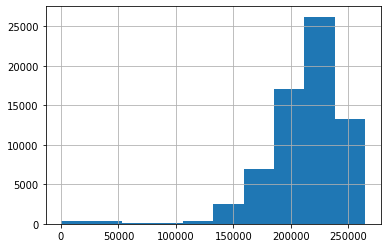

overall


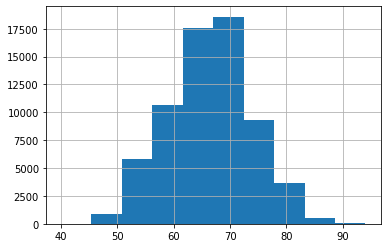

potential


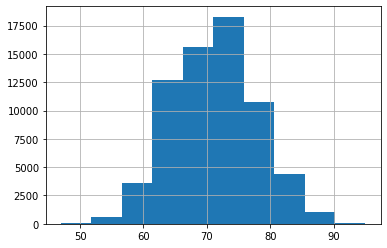

value_eur


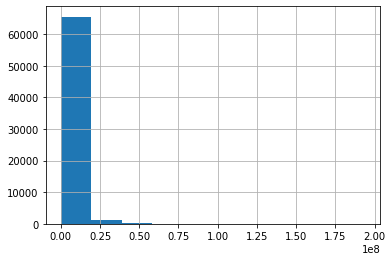

wage_eur


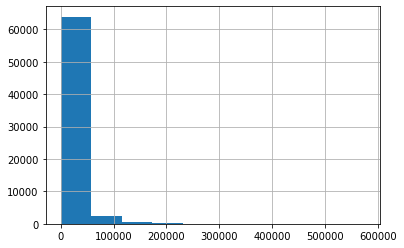

age


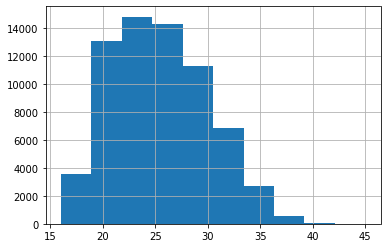

height_cm


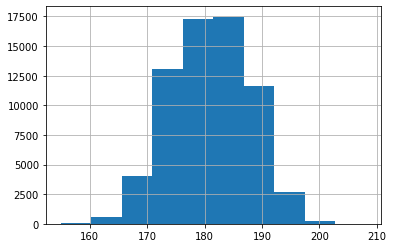

weight_kg


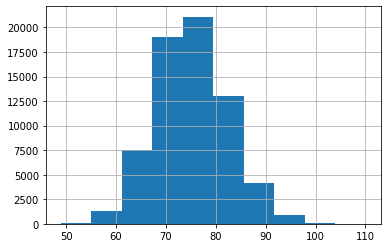

club_team_id


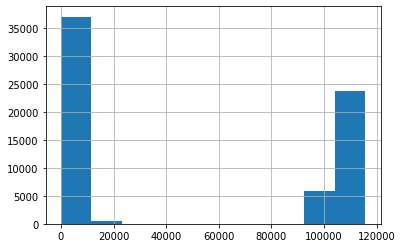

nationality_id


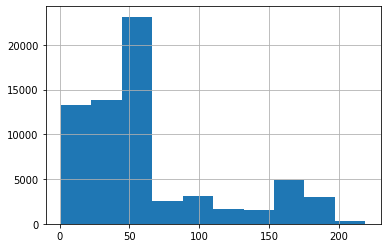

club_contract_valid_until


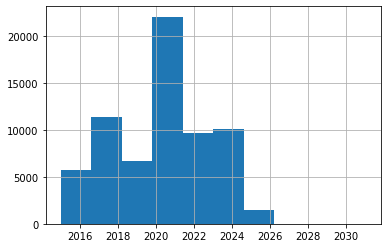

weak_foot


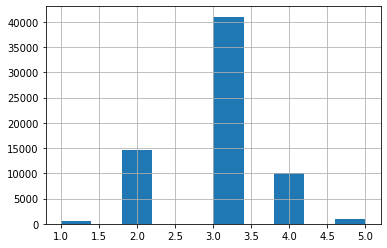

skill_moves


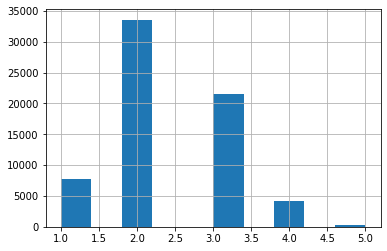

international_reputation


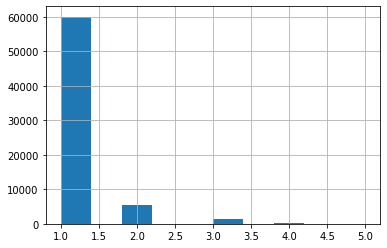

pace


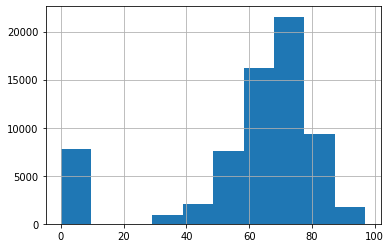

shooting


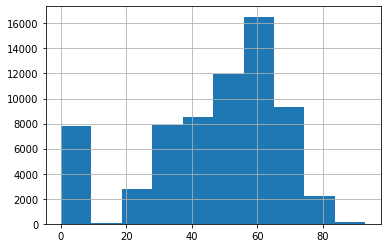

passing


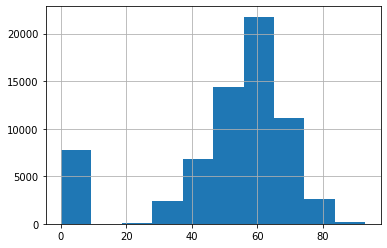

dribbling


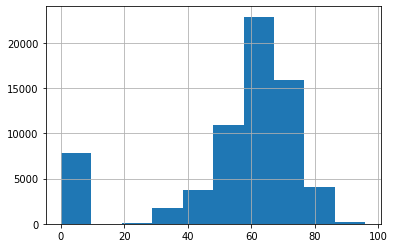

defending


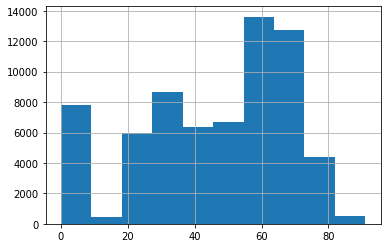

physical


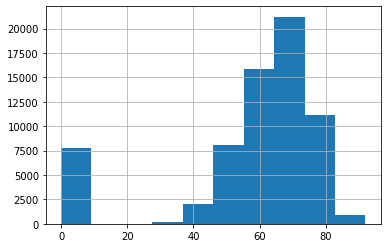

crossing


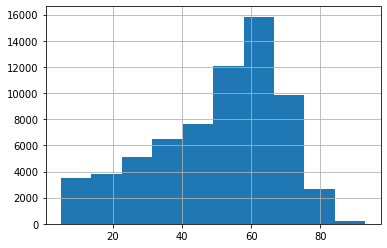

finishing


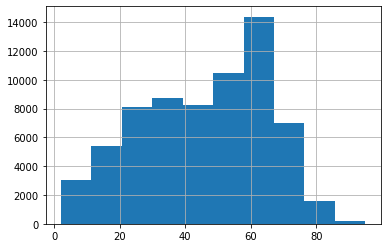

heading_accuracy


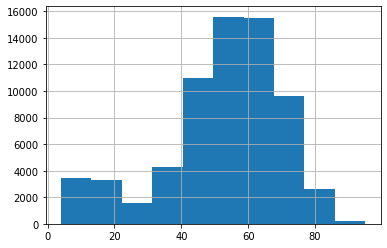

short_passing


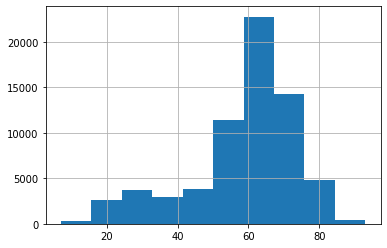

volleys


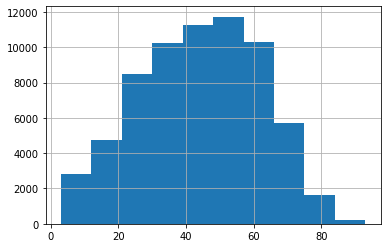

skill_dribbling


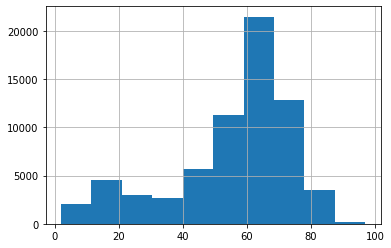

curve


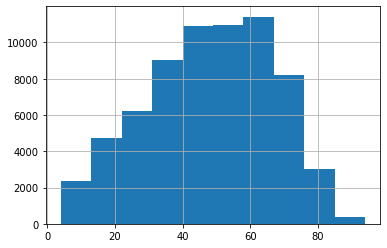

fk_accuracy


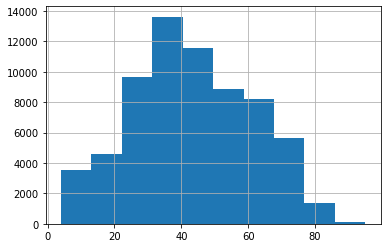

long_passing


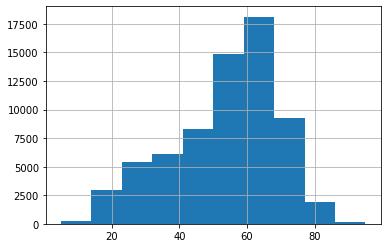

ball_control


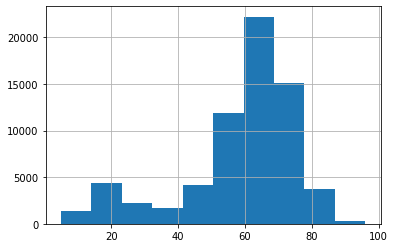

acceleration


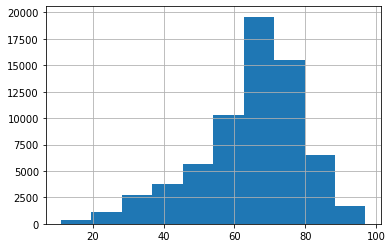

sprint_speed


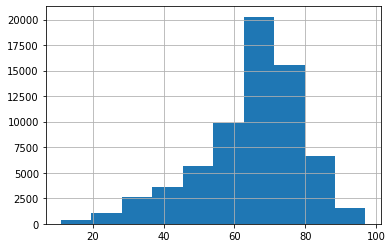

agility


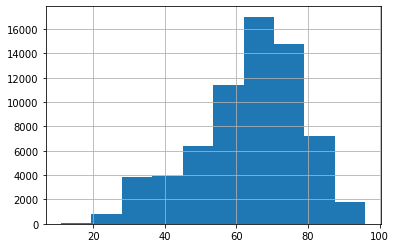

reactions


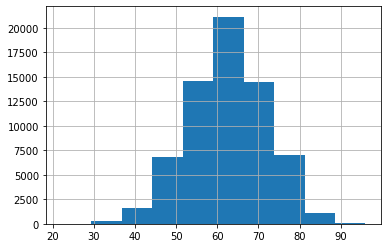

balance


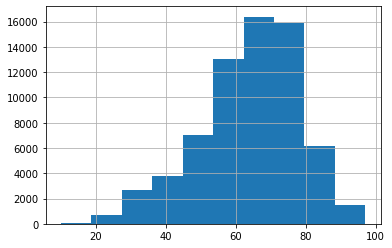

shot_power


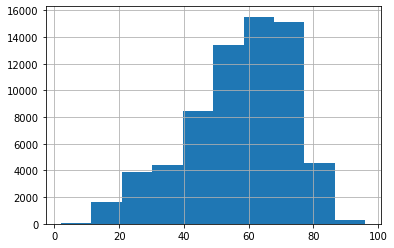

jumping


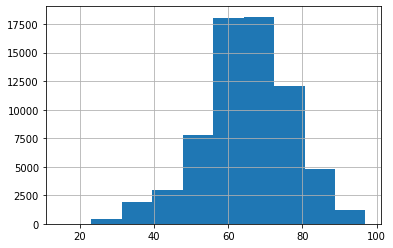

stamina


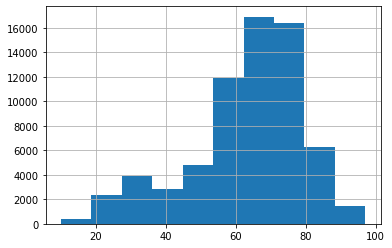

strength


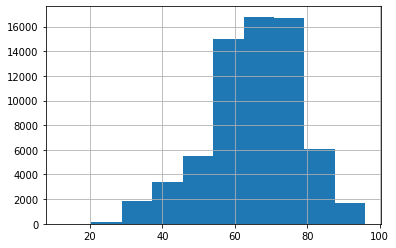

long_shots


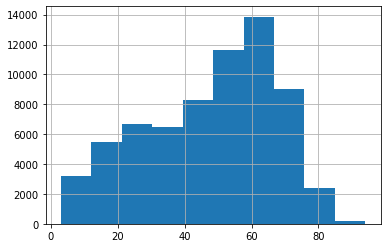

aggression


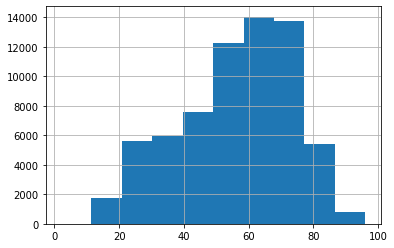

interceptions


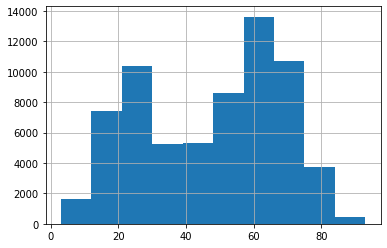

positioning


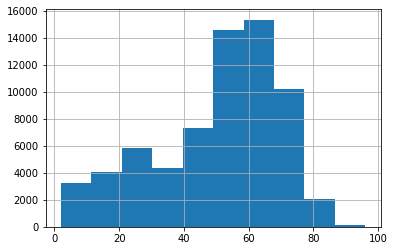

vision


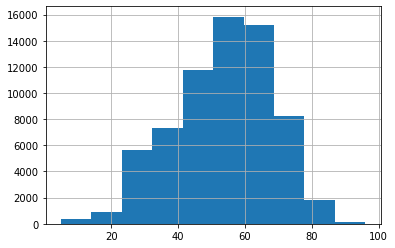

penalties


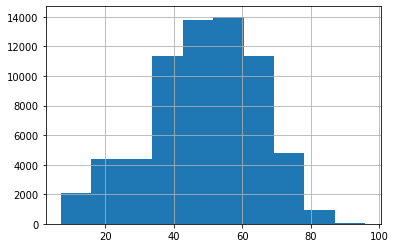

marking


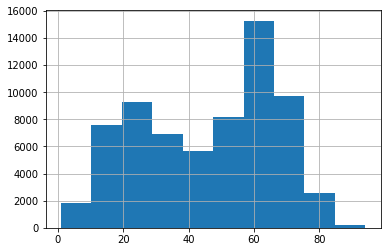

standing_tackle


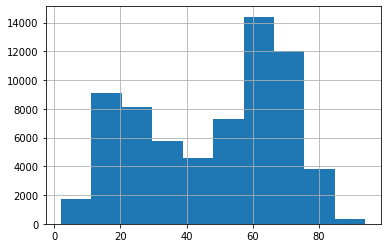

sliding_tackle


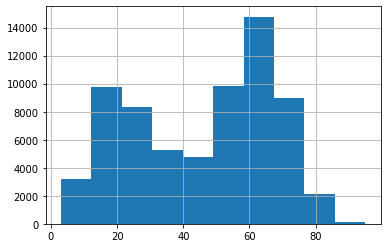

gk_diving


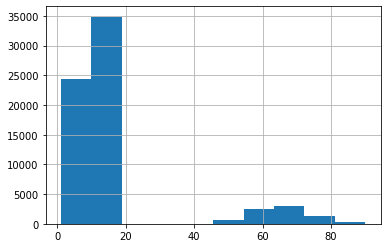

gk_handling


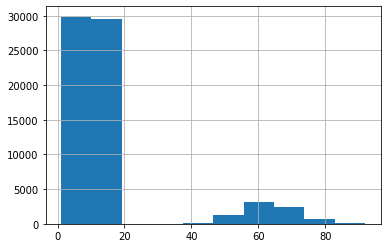

gk_kicking


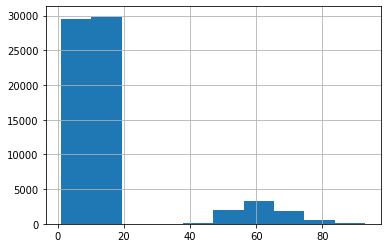

gk_positioning


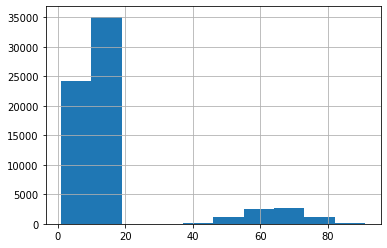

gk_reflexes


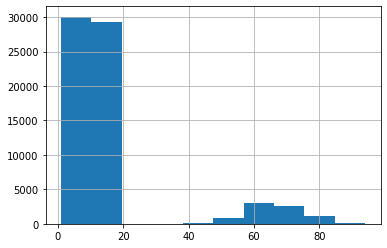

gk_speed


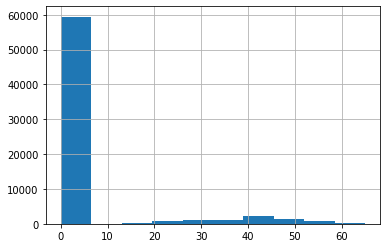

year


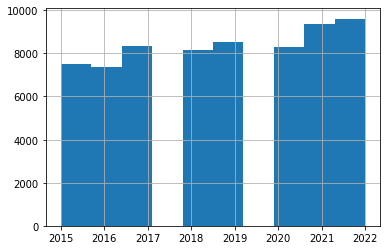

total_wage


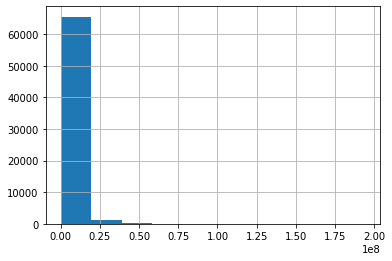

age_bins


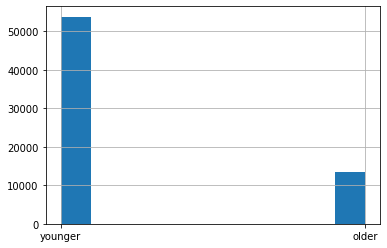

height_bins


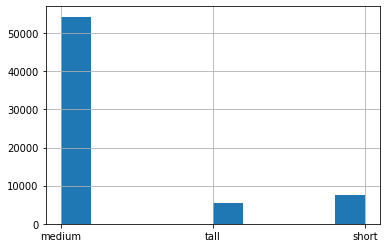

weight_bins


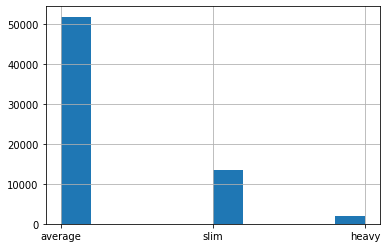

year_joined


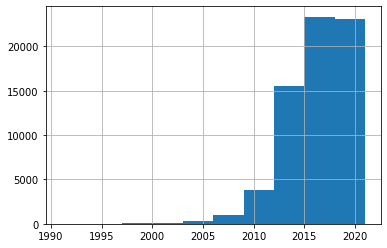

seniority


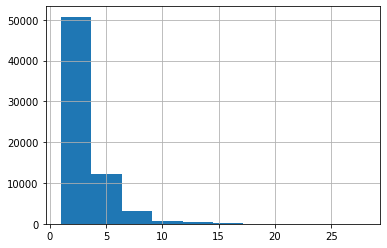

league_encoded


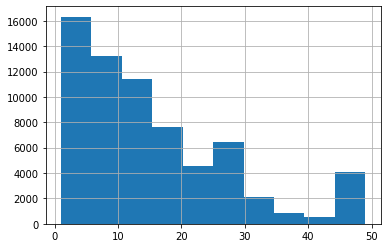

club_position_encoded


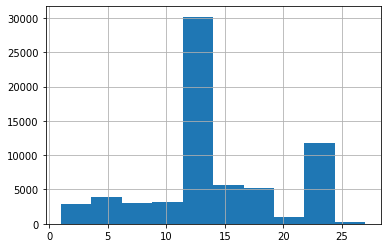

work_rate_encoded


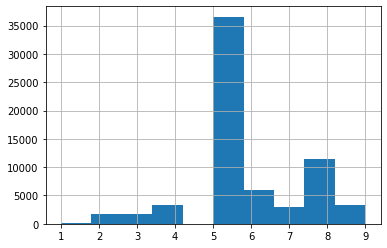

preferred_foot_encoded


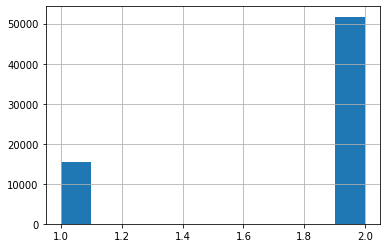

age_bins_encoded


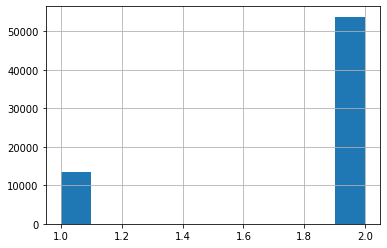

weight_bins_encoded


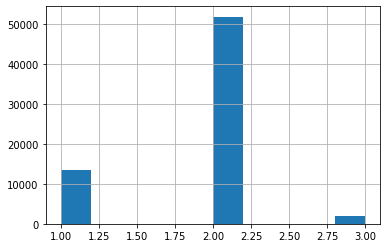

body_type_encoded


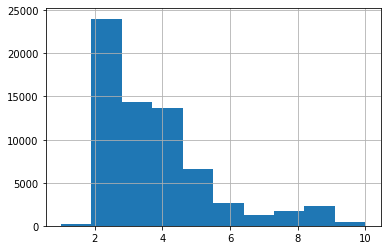

In [24]:
#histograms of numeric columns
for col in numcols:
    print(col)
    train[col].hist()
    plt.show()

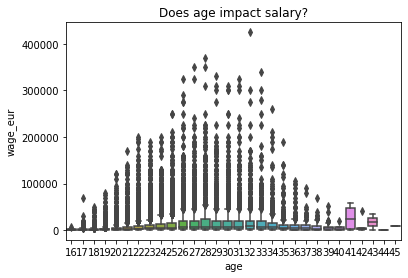

In [25]:
sns.boxplot(cb_df.age, cb_df.wage_eur)
plt.title("Does age impact salary?")
rcParams['figure.figsize'] = 12, 5
plt.show()

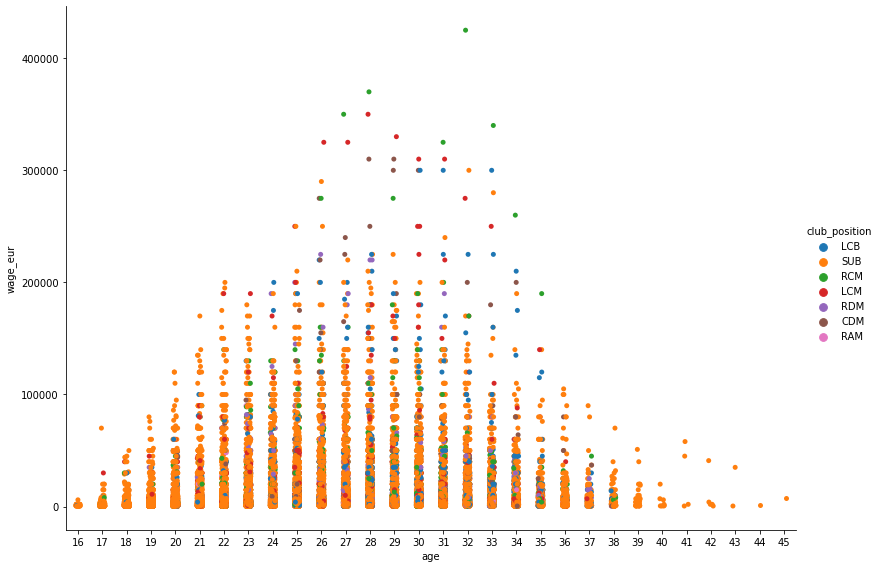

In [26]:
sns.catplot(data=cb_df, x='age', y='wage_eur', 
    hue='club_position', height=8, aspect=11.7/8.27)

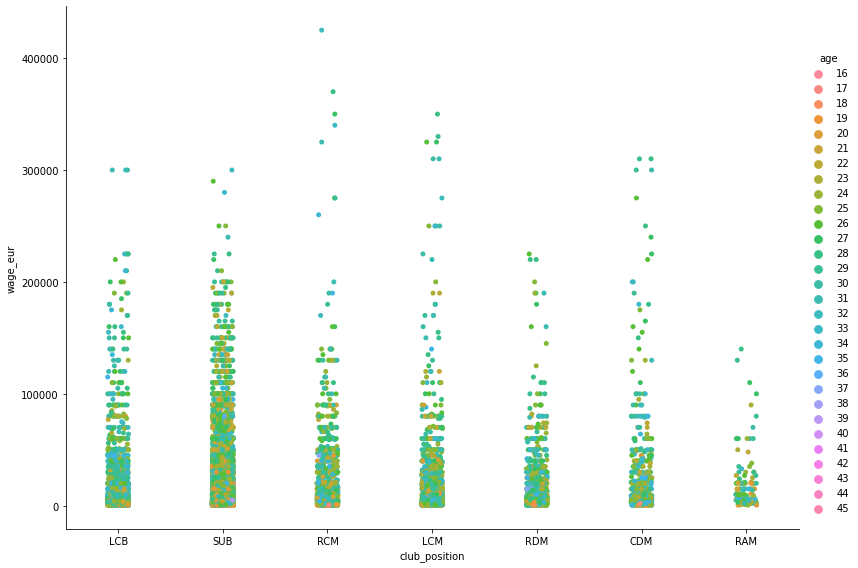

In [27]:
sns.catplot(data=cb_df, x='club_position', y='wage_eur', 
    hue='age', height=8, aspect=11.7/8.27)

# would recommend adding age group for exploration

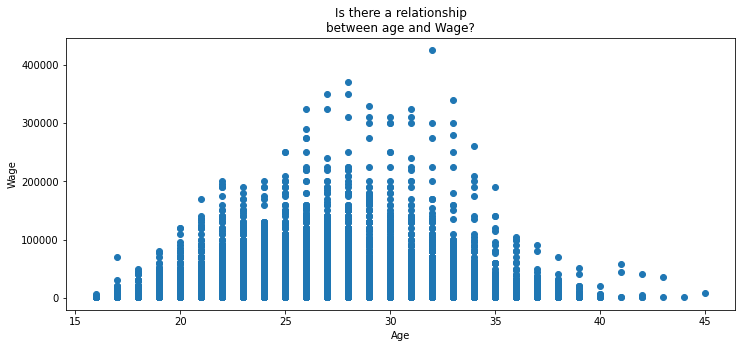

In [28]:
# plot age by salary
plt.scatter(cb_df.age, cb_df.wage_eur)
plt.xlabel("Age")
plt.ylabel("Wage")
plt.title("Is there a relationship\nbetween age and Wage?")
plt.show()

In [29]:
# calculates the mean age by position
cb_mean = cb_df.groupby('club_position').age.mean() 

In [30]:
cb_mean.head().T

club_position
CDM    27.157895
LCB    27.328683
LCM    26.603709
RAM    26.630252
RCM    26.428070
Name: age, dtype: float64

In [31]:
#cb_df.groupby('club_position').age.transform('mean')

In [32]:
# adds the mean age for that club position
cb_df['cb_mean'] = cb_df.groupby('club_position').age.transform('mean')
cb_df.head().T

95087                    9380                         19090                    86423                   60537
sofifa_id                            200653                   239191                       264070                   232171                  235997
short_name                      G. Burdisso              S. Demhasaj                   A. Popovic               M. Vázquez            Fran Beltrán
player_positions                         CB                       ST                           CB                  CAM, RM                 CDM, CM
overall                                  74                       66                           50                       64                      72
potential                                74                       70                           67                       71                      80
value_eur                         2800000.0                1200000.0                     110000.0                 625000.0               3800000.0
wage_eur                            30000.0                   5000.0                        500.0                   1000.0                  7000.0
age                                      27                       25                           18                       24                      19
height_cm                               189                      191                          184                      174                     170
weight_kg                                85                       78                           82                       71                      64
club_team_id                       110781.0                    322.0                     111393.0                 111722.0                   450.0
club_name                         Club León  Grasshopper Club Zürich              Adelaide United     Club Deportes Tolima        RC Celta de Vigo
league_name                 Mexican Liga MX       Swiss Super League  Australian Hyundai A-League  Colombian Liga Postobón  Spain Primera Division
nationality_id                           52                      219                          195                       52                      45
nationality_name                  Argentina                   Kosovo                    Australia                Argentina                   Spain
club_position                           LCB                      SUB                          SUB                      SUB                     SUB
position                   Left Centre Back               Substitute                   Substitute               Substitute              Substitute
club_joined                      2015-06-30               2020-07-20                   2021-06-28               2017-07-10              2018-08-01
club_contract_valid_until            2018.0                   2023.0                       2022.0                   2020.0                  2023.0
body_type                       Lean (185+)              Lean (185+)             Normal (170-185)         Normal (170-185)           Normal (170-)
preferred_foot                        Right                    Right                        Right                     Left                   Right
weak_foot                                 3                        3                            3                        2                       3
skill_moves                               2                        2                            2                        3                       2
international_reputation                  1                        1                            1                        1                       1
work_rate                       High/Medium            Medium/Medium                Medium/Medium            Medium/Medium           Medium/Medium
pace                                     50                       64                           58                       69                      70
shooting                                 41                       69 

In [33]:
# aggregates totals fore each club position
df.groupby("club_position").agg(["min", "mean", "median", "std", "max"])

sofifa_id                                                overall                                 potential                                 value_eur                                                     wage_eur                                                age                                 height_cm                                   weight_kg                                  club_team_id                                                 nationality_id                                   club_contract_valid_until                                        weak_foot                                skill_moves                                international_reputation                                pace                                  shooting                                  passing                                  dribbling                                  defending                                  physical                                  crossing                               \
                    min           mean    median           std     max     min       mean median       std max       min       mean median       std max       min          mean     median           std          max      min          mean   median           std       max min       mean median       std max       min        mean median       std  max       min       mean median       std  max          min          mean    median           std       max            min       mean median        std  max                       min         mean  median       std     max       min      mean median       std max         min      mean median       std max                      min      mean median       std max  min       mean median        std max      min       mean median        std max     min       mean median        std max       min       mean median        std max       min       mean median        std max      min       mean median        std max      min       mean median        std   
club_position                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
CAM                  41  200045.625573  204700.0  36296.721002  263049      49  71.125000   71.0  6.253525  93        55  73.831422   74.0  6.258462  94   30000.0  5.560152e+06  2100000.0  1.005353e+07  107500000.0    500.0  21020.498853  10000.0  33927.136326  560000.0  17  26.823394   27.0  4.237201  39       155  177.025229  177.0  6.130017  196        50  72.048165   72.0  6.016613   96          1.0  51135.263188    1911.0  54161.485551  115530.0              1  56.787271   51.0  43.700003  219                    2015.0  2019.980505  2020.0  2.466452  2026.0         1  3.329128    3.0  0.702867   5           2  3.197821    3.0  0.658042   5                        1  1.284977    1.0  0.616919   5   32  70.711583   72.0   9.271636  94       35  66.140482   67.0   7.777624  92      35  69.092317   70.0   7.568852  91        48  72.480505   73.0   6.684572  95        17  44.515482   43.0  12.490538  83       32  62.263188   63.0   8.815447  87       26  65.609518   66.0   9.732718   
CB                

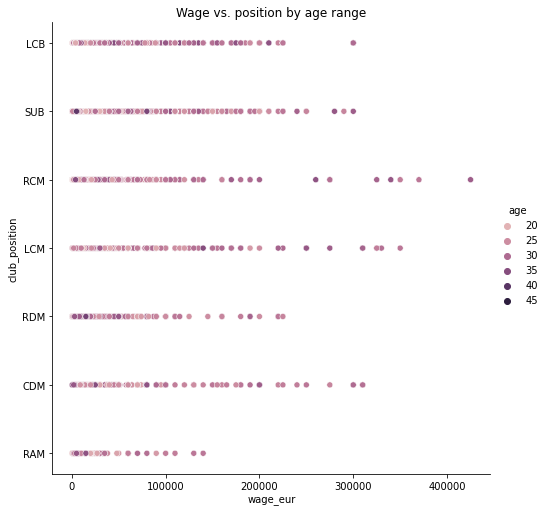

In [34]:
sns.relplot(data=cb_df, x="wage_eur", y="club_position", hue='age', 
            height=7, aspect=1).set(title="Wage vs. position by age range")

In [35]:
#values = ['Russia', 'Italian', 'US']
#conditions = list(map(cb_df['league_name'].str.contains, values))

#cb_df['country_name'] = np.select(conditions, values, 'other')

In [36]:
test_results = stats.pearsonr(cb_df.wage_eur, cb_df.age)
test_results


(0.1572436613983417, 3.747687299610943e-198)

In [37]:
r, p = test_results

print(f'p is {p:.10f}')

p is 0.0000000000


# H0: The average wage for players is no different than the population mean.

In [38]:
#players_total_salary = cb_df[cb_df.age.mean()].wage_eur
cb_mean_salary = cb_df.cb_mean
overall_total_wage_mean = cb_df.wage_eur.mean()

test_results = stats.ttest_1samp(cb_mean, overall_total_wage_mean)
test_results


Ttest_1sampResult(statistic=-44624.89705147285, pvalue=8.547525519628652e-27)

In [39]:
rcm_total = cb_df[cb_df.club_position == 'RCM'].wage_eur
overall_total_rcm_mean = cb_df.wage_eur.mean()

test_results1 = stats.ttest_1samp(rcm_total, overall_total_rcm_mean)
test_results1


Ttest_1sampResult(statistic=6.368877627304559, pvalue=2.563633594742828e-10)

In [40]:
#'RCM', 'RAM', 'CDM', 'LCB', 'RDM', 'LCM', 'SUB'
ram_total = cb_df[cb_df.club_position == 'RAM'].wage_eur
overall_total_ram_mean = cb_df.wage_eur.mean()

test_results2 = stats.ttest_1samp(ram_total, overall_total_ram_mean)
test_results2


Ttest_1sampResult(statistic=2.871634369361002, pvalue=0.004842367964643816)

In [41]:
#'RCM', 'RAM', 'CDM', 'LCB', 'RDM', 'LCM', 'SUB'
cdm_total = cb_df[cb_df.club_position == 'CDM'].wage_eur
overall_total_cdm_mean = cb_df.wage_eur.mean()

test_results3 = stats.ttest_1samp(cdm_total, overall_total_cdm_mean)
test_results3


Ttest_1sampResult(statistic=6.334184622961597, pvalue=4.648003805133785e-10)

# # Does seniority(length of time playing with a club) impact salary?

Text(0.5, 1.0, 'Visual of Rawwww data')

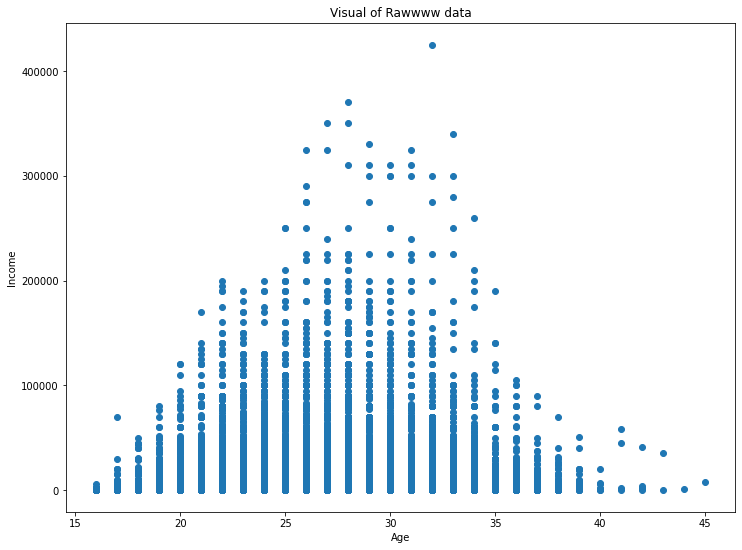

In [42]:
plt.figure(figsize = (12,9))
plt.scatter(cb_df.age, cb_df.wage_eur)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visual of Rawwww data')

In [43]:
cb_df.wage_eur.min()

500.0

- graph represents all points in current data set, which our K-means algorithm will aim to segment.
- Another observation from the graph concerns the domains of the two variables Age and wage.
- The domain for Age is from around 16 to 45, whereas for wage is from around 500 to 425000. 
- This points to a vast difference between the range of these values. 
- Now we must incorporate an important step in analysis, and we must first standardize our data.

In [44]:
cb_df.head().T

95087                    9380                         19090                    86423                   60537
sofifa_id                            200653                   239191                       264070                   232171                  235997
short_name                      G. Burdisso              S. Demhasaj                   A. Popovic               M. Vázquez            Fran Beltrán
player_positions                         CB                       ST                           CB                  CAM, RM                 CDM, CM
overall                                  74                       66                           50                       64                      72
potential                                74                       70                           67                       71                      80
value_eur                         2800000.0                1200000.0                     110000.0                 625000.0               3800000.0
wage_eur                            30000.0                   5000.0                        500.0                   1000.0                  7000.0
age                                      27                       25                           18                       24                      19
height_cm                               189                      191                          184                      174                     170
weight_kg                                85                       78                           82                       71                      64
club_team_id                       110781.0                    322.0                     111393.0                 111722.0                   450.0
club_name                         Club León  Grasshopper Club Zürich              Adelaide United     Club Deportes Tolima        RC Celta de Vigo
league_name                 Mexican Liga MX       Swiss Super League  Australian Hyundai A-League  Colombian Liga Postobón  Spain Primera Division
nationality_id                           52                      219                          195                       52                      45
nationality_name                  Argentina                   Kosovo                    Australia                Argentina                   Spain
club_position                           LCB                      SUB                          SUB                      SUB                     SUB
position                   Left Centre Back               Substitute                   Substitute               Substitute              Substitute
club_joined                      2015-06-30               2020-07-20                   2021-06-28               2017-07-10              2018-08-01
club_contract_valid_until            2018.0                   2023.0                       2022.0                   2020.0                  2023.0
body_type                       Lean (185+)              Lean (185+)             Normal (170-185)         Normal (170-185)           Normal (170-)
preferred_foot                        Right                    Right                        Right                     Left                   Right
weak_foot                                 3                        3                            3                        2                       3
skill_moves                               2                        2                            2                        3                       2
international_reputation                  1                        1                            1                        1                       1
work_rate                       High/Medium            Medium/Medium                Medium/Medium            Medium/Medium           Medium/Medium
pace                                     50                       64                           58                       69                      70
shooting                                 41                       69 

In [45]:
#adding same features from regression project
cb_df['club_joined'] = cb_df.club_joined.astype('str')
cb_df['club_joined_year'] = cb_df.club_joined.str.split('-',expand=True)[0]

___
# Next goal will be to use a PCA algorithm to reduce the number of features to a smaller number of principal components.

In [46]:
cb_df.shape

(36027, 81)

In [50]:
# only return numerical columns segmentation
cb_df_pca = cb_df.drop(columns = ['short_name','player_positions','club_name','league_name','nationality_name',
                                  'club_position','position','club_joined','body_type','preferred_foot','work_rate',
                                 'sofifa_id','club_team_id','club_contract_valid_until','year','year_joined',
                                  'age_bins','height_bins','weight_bins','cb_mean'])

In [59]:
from sklearn.preprocessing import RobustScaler

# scale data since there are so many features
scaler = RobustScaler()
segmentation_std = scaler.fit_transform(cb_df_pca)

In [60]:
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [64]:
# shows how much variance is explained by each of the individual components
pca.explained_variance_ratio_

array([7.64470662e-01, 1.11631209e-01, 2.18869502e-02, 1.87060928e-02,
       1.07682045e-02, 1.00581515e-02, 7.98139231e-03, 6.67429609e-03,
       5.30485527e-03, 5.01749635e-03, 4.74603519e-03, 3.63735349e-03,
       3.37800443e-03, 2.33286779e-03, 1.80970430e-03, 1.55207889e-03,
       1.37907394e-03, 1.29282780e-03, 1.15428097e-03, 1.09685413e-03,
       1.07380846e-03, 1.01641575e-03, 9.71559555e-04, 9.47051252e-04,
       8.47449437e-04, 7.99398660e-04, 7.27393396e-04, 6.58721793e-04,
       6.28522770e-04, 6.10453718e-04, 5.67475023e-04, 5.18343082e-04,
       5.00929362e-04, 4.67902041e-04, 4.40522418e-04, 4.05259911e-04,
       3.84634328e-04, 3.44374117e-04, 3.31493403e-04, 3.27525404e-04,
       2.89855717e-04, 2.62910261e-04, 2.43294087e-04, 2.25857346e-04,
       2.19494575e-04, 2.11408072e-04, 2.04600435e-04, 1.91692510e-04,
       1.72168896e-04, 1.38406502e-04, 9.94046766e-05, 8.38189737e-05,
       7.01310729e-05, 6.21386728e-05, 3.02779144e-05, 2.73910805e-05,
      

# PCA applied linear transformation of each feature. Will have to drop columns that do not make up a players stats.

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

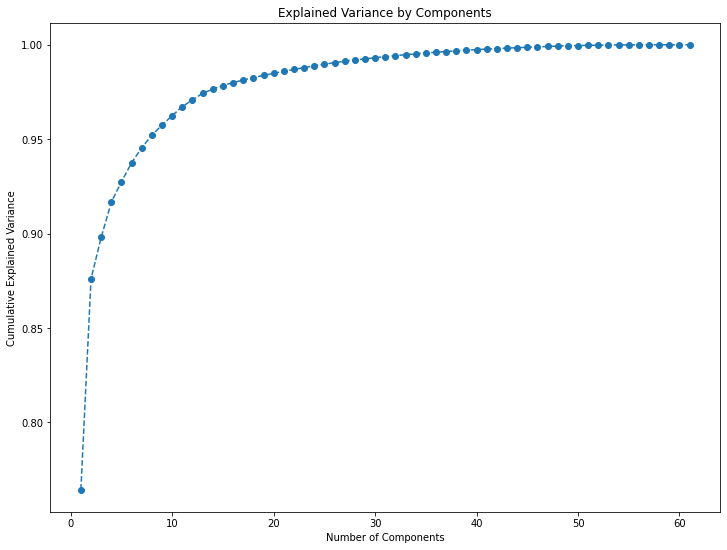

In [68]:
#shows the cumulative explained variance against the number of components chosen.
plt.figure(figsize = (12,9))
plt.plot(range(1,62), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks()



### The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). Should preserve around 80 % of the variance. So, in this instance, we decide to keep 10 components.

In [69]:
# based off the graph, we will keep 4 components 
pca = PCA(n_components = 4)

In [70]:
# fits the model with the selected number of components 
pca.fit(segmentation_std)

PCA(n_components=4)

In [71]:
pca.transform(cb_df_pca)

array([[-143806.47496887, 3549437.25855933,  546229.18330051,
         916807.67590133],
       [ -61356.73393892, 1513554.50608813,  233295.61275556,
         391807.94969579],
       [  -5664.89760759,  138807.38523808,   21346.72748333,
          35937.68432597],
       ...,
       [ -91856.42162657, 2266890.75771067,  349790.2435657 ,
         587242.70291861],
       [ -92309.61948862, 2277630.35914969,  350690.84646464,
         588748.54534539],
       [ -82533.75080543, 2035947.43767683,  312690.33116357,
         524941.52588264]])

In [72]:
scores_pca = pca.transform(segmentation_std)

In [73]:
wcss = []
for i in range (1,62):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

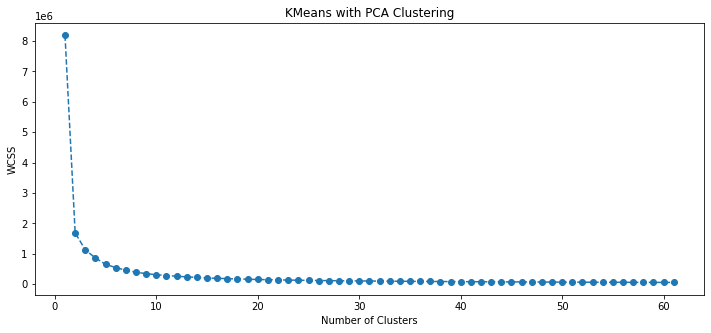

In [74]:
#plots whe WCSS against the number of components 8
plt.plot(range(1, 62), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title("KMeans with PCA Clustering")
plt.show()

In [75]:
# four clusters chosen, so we run Kmeans with the number of clusters equal to four
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
# fit data with the kmeans pca model
kmeans_pca.fit(scores_pca)
#cluster = kmeans_pca.predict(scores_pca)

KMeans(n_clusters=3, random_state=42)

In [77]:
# Create new data frame with original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([cb_df_pca.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-4:] = ['component_1','component_2','component_3','component_4']

# adds the last column which contains the pca k-means clustering labels
df_segm_pca_kmeans['Segment_KMeans_PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

overall  potential  value_eur  wage_eur  age  height_cm  weight_kg  nationality_id  weak_foot  skill_moves  international_reputation  pace  shooting  passing  dribbling  defending  physical  crossing  finishing  heading_accuracy  short_passing  volleys  skill_dribbling  curve  fk_accuracy  long_passing  ball_control  acceleration  sprint_speed  agility  reactions  balance  shot_power  jumping  stamina  strength  long_shots  aggression  interceptions  positioning  vision  penalties  marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  gk_kicking  gk_positioning  gk_reflexes  gk_speed  total_wage  seniority  league_encoded  club_position_encoded  work_rate_encoded  preferred_foot_encoded age_bins_encoded weight_bins_encoded  body_type_encoded club_joined_year  component_1  component_2  component_3  component_4  Segment_KMeans_PCA
0       74         74  2800000.0   30000.0   27        189         85              52          3            2                         1    50        41       49         49         74        80        41         39                79             59       36               42     50           11            46            58            50            50       48         69       42          67       47       71        87          21          80             71           31      51         48       74               76              73         10           14          14               8            8         0   2830000.0          2              10                      8                  8                       2                2                   2                  5             2015    -4.175091     0.782423     3.880185    -2.091117                   0
1       66         70  1200000.0    5000.0   25        191         78             219          3            2                         1    64        69       46         65         29        58        37         70                65             52       61               67     53           40            45            68            59            68       65         58       42          67       71       51        70          69          31             12           66      44         69       39               20              25         10           12          11              11           12         0   1205000.0          2              26                     12                  5                       2                2                   2                  5             2020    -4.033567    -1.770042    -0.335911     1.396416                   0
2       50         67   110000.0     500.0   18        184         82             195          3            2                         1    58        22       27         34         51        61        20         17                40             28       26               29     23           27            25            32            64            53       47         43       55          33       66       61        68          16          40             53           25      33         38       51               54              51         14           14          14              10            7         0    110500.0          1              28                     12                  5                       2                2                   2                  2             2021    -2.862778    -4.088841     3.362672     3.860348                   0
3       64         71   625000.0    1000.0   24        174         71              52          2            3                         1    69        53       58         67         32        49        46         52                43             62       36               67     44           43            59            61            73            65       79         65       77          50       50       58        48          68          39             19           50      69         43       33               34              37          9           11          13             

In [81]:
# create new column named Clusters and map the four clusters directly inside it.
df_segm_pca_kmeans['segment'] = df_segm_pca_kmeans['Segment_KMeans_PCA'].map({0:'1', 1:'2', 2:'3', 3:'4'})

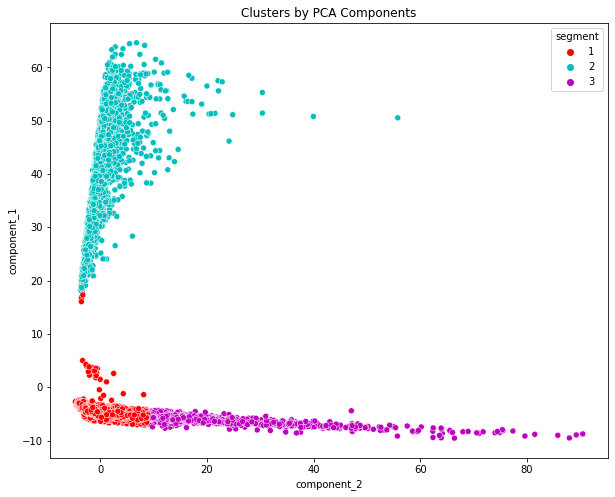

In [84]:
# Plots data by PCA Components.
x_axis = df_segm_pca_kmeans['component_2'] # second component
y_axis = df_segm_pca_kmeans['component_1'] # first compenent
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['segment'], palette = ['r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

<AxesSubplot:>

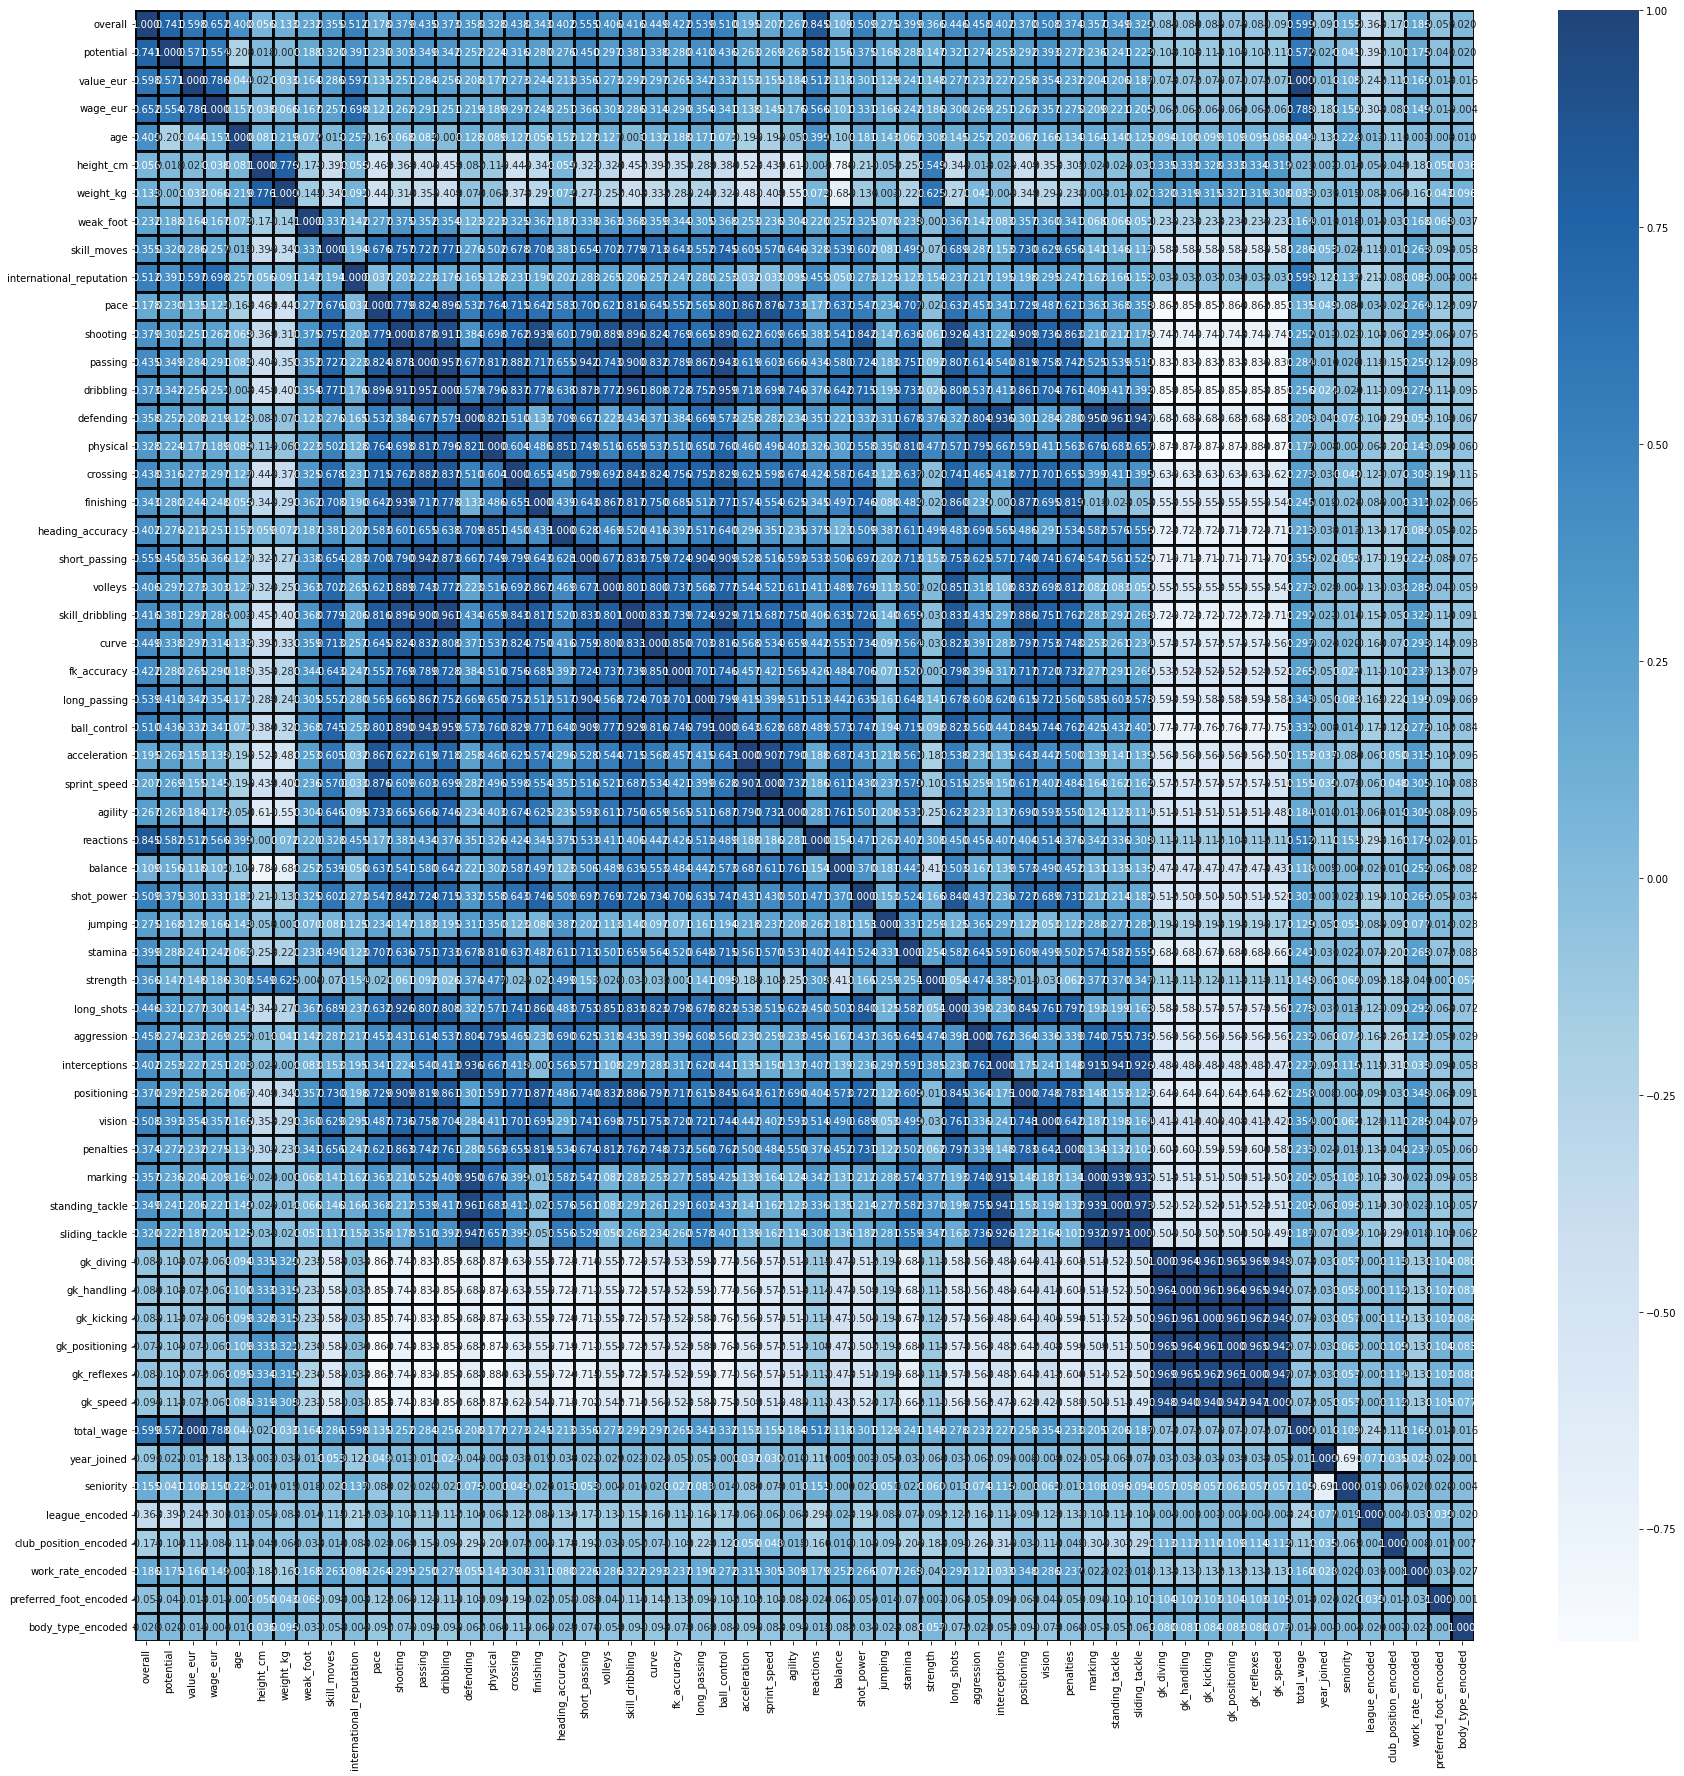

In [86]:
# using corr() function to find correlation between features
train_corr = cb_df.drop(columns=['short_name', 'player_positions', 'club_name', 'league_name', 'club_position', 
                                  'position', 'nationality_name', 'preferred_foot', 'work_rate', 'year', 
                                  'cb_mean', 'nationality_id', 'club_contract_valid_until', 'club_joined', 
                                  'club_team_id', 'sofifa_id'
                                ]).corr(method='pearson')
# plots a heatmap and correlation values
kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}

plt.figure(figsize=(30, 30))
sns.heatmap(train_corr, cmap="Blues", annot=True, fmt='1.3f', **kwargs)